In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### K-means

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

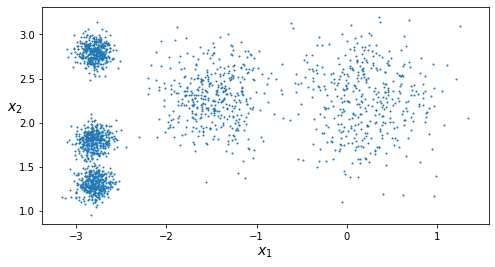

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [7]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [8]:
y_pred is kmeans.labels_

True

In [9]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### Decision Boundary

In [11]:

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

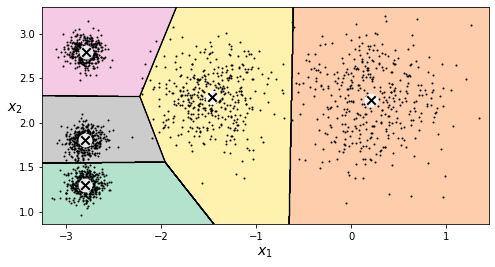

In [12]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Hard Clustering vs Soft Clustering


Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better measure the distance of each instance to all 5 centroids. This is what the transform() method does:

In [13]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In the KMeans class, the transform() method
measures the distance from each instance to every centroid

### Inertia 群內距離總和 (Smaller is better)

In [14]:
kmeans.inertia_

211.59853725816828

### Accelerated K-Means

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this 2003 paper by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

In [15]:
# %timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

In [16]:
# %timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

### Mini-batch K-Means

In [17]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [18]:
minibatch_kmeans.inertia_

220.21595910924867

### Finding the optimal number of clusters

In [19]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

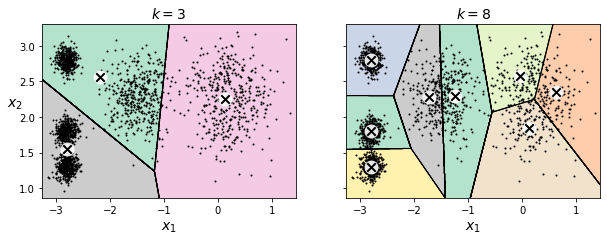

In [20]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [21]:
kmeans_k3.inertia_

653.2167190021556

In [22]:
kmeans_k8.inertia_

119.11983416102889

In [23]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

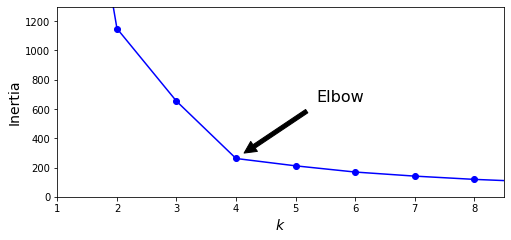

In [24]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

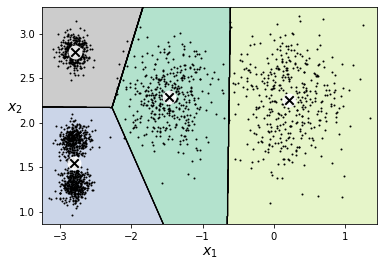

In [25]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [28]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

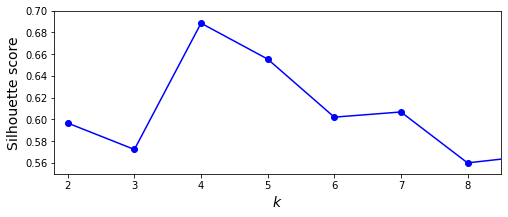

In [29]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

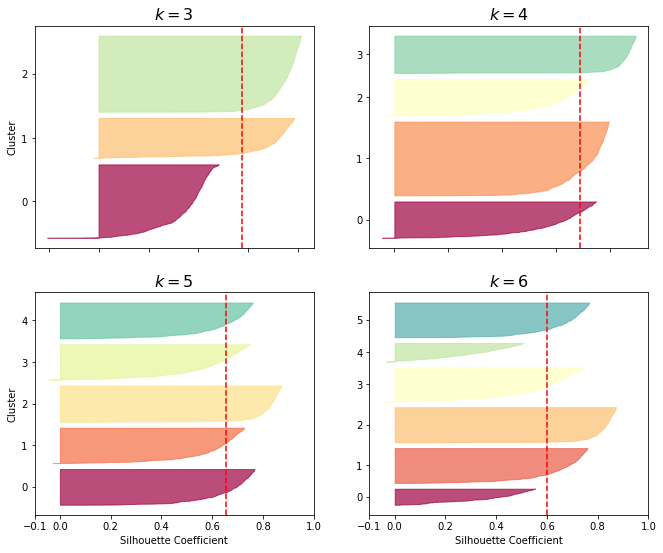

In [30]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11,9))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X,y_pred)
    
    padding = len(X)//30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred==i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos, pos+len(coeffs)), 0, coeffs, facecolor=color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)    
    
plt.show()    
    
    

### Limits of K-Means

In [31]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

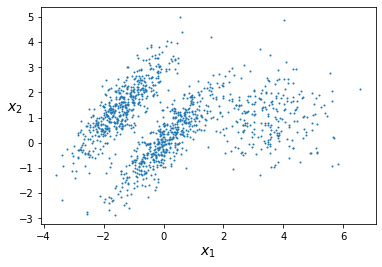

In [32]:
plot_clusters(X)

In [33]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

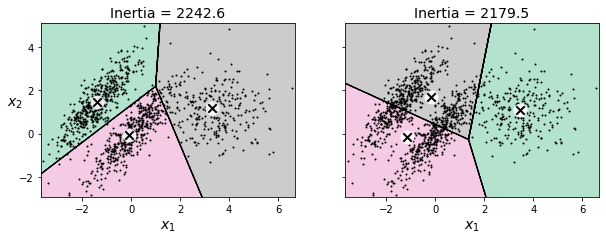

In [34]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

### Using clustering for image segmentation

In [35]:
# Download the ladybug image
import os
import urllib

images_path = os.path.join(".", "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x218d5fbcc88>)

In [36]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [37]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [38]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

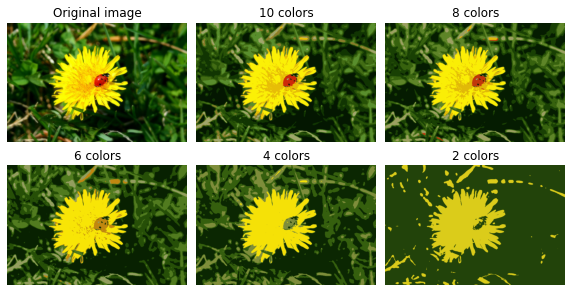

In [39]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Using Clustering for Preprocessing

In [40]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

the plot is 0


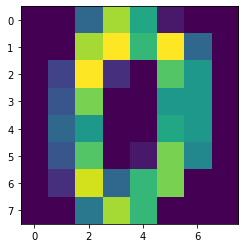

In [41]:
plt.imshow(X_digits[0].reshape(8,8))
print('the plot is', y_digits[0])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [44]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
# use KMeans and k = 50 to do the preprocessing

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [47]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

In [48]:
# How much did the error rate drop?

1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

In [49]:
# experience k = 2 to 100 to search the better parameter k

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 50))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.5s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 50)}, verbose=2)

In [50]:
grid_clf.best_params_

{'kmeans__n_clusters': 33}

In [51]:
grid_clf.score(X_test, y_test)

0.9755555555555555

### Using Clustering for Semi-Supervised Learning

In [52]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [53]:
k = 50

In [54]:
kmeans = KMeans(n_clusters=k, random_state=42)

# 將 X_train 維度(1347,64) 的資料透過 KMeans k=50 將資料縮成50維, 並透過 Transform 函數產生新的50維數據 
X_digits_dist = kmeans.fit_transform(X_train)

# np.argmin, axis = 0 意思為 每〝行(column)〞數據取各行最小的index, 這邊有1347列 50行的資料 因此np.argmin會產生50筆資料
# 類似取離50個中心最近的那50筆資料出來做代表資料
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [55]:
print('After preprocessing: \n',X_digits_dist[0])
print('shape = ', X_digits_dist[0].shape)
print('\nbefore preprocessing: \n',X_train[0])
print('shape = ', X_train[0].shape)

After preprocessing: 
 [31.33905994 41.96889871 39.35726202 42.40981717 44.61166459 48.18806744
 45.32546197 38.61872926 49.29623259 56.33420118 30.3917992  44.8159616
 43.52214707 43.12529102 56.27087576 50.86204251 52.75366957 51.47832951
 40.49915824 54.01277627 48.19882762 40.51434449 42.40717417 41.0105779
 41.59268185 47.33575405 44.61228224 45.48980689 35.79222927 50.68198815
 47.56015927 38.09933014 56.30325224 32.21555084 46.82577347 44.80981948
 35.10500048 51.91008996 41.85089204 48.11745272 38.05510624 51.48219757
 45.35671763 36.86124131 37.76742797 41.72780931 49.97279872 52.16098656
 43.01099731 47.0563954 ]
shape =  (50,)

before preprocessing: 
 [ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
 13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
 16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
  0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
shape =  (64,)


In [56]:
representative_digit_idx

array([ 911,  559,   23,  159,  736, 1056,  776,  795,  753,  598,  737,
        683, 1194,  602,  817, 1284,   73,  702,   94,  891,  805, 1071,
       1314, 1022, 1050,  525,  588,  481, 1005,  766,  848,  731,  749,
       1322, 1336,  705, 1151,  494,  357,  459,  843,  850,  151,  256,
        576,  460,  596,  648,  841,  214], dtype=int64)

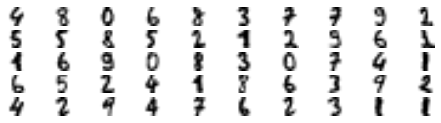

In [57]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
    
plt.show()

In [58]:
# 進行人工標籤作業
y_representative_digits = np.array(
      [4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 
       5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 
       1, 6, 9, 0, 8, 3, 0, 7, 4, 1, 
       6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 
       4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

In [59]:
# 利用這些離中心最近的50筆代表性資料做建模
# 比直接用原始資料集的前50筆還要有效

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

In [60]:
# 創建一組名為 y_train_propagated 長度為len(X_train) 的 整數隨機向量  
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

In [61]:
# 配合 kmean.labels_，利用人工標記的50筆資料，將剛剛產生 y_train_propagated 填上 label

for i in range(k):
    y_train_propagated[kmeans.labels_== i] = y_representative_digits[i]

In [62]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

In [63]:
# Use Partial Data (About 300 data)

percentile_closest = 20 
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

c:\users\user\pythonenv\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9444444444444444

In [64]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

### DBSCAN

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [66]:
dbscan.labels_[:5]

array([0, 1, 2, 5, 2], dtype=int64)

In [67]:
len(dbscan.core_sample_indices_)

795

In [68]:
dbscan.core_sample_indices_

array([  0,   1,   4,   5,   7,   9,  10,  11,  12,  13,  14,  15,  16,
        18,  19,  21,  22,  23,  24,  26,  27,  29,  30,  31,  32,  33,
        35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  47,  49,  50,
        51,  53,  54,  56,  57,  58,  59,  60,  61,  62,  66,  68,  69,
        70,  71,  72,  73,  74,  75,  77,  78,  79,  80,  81,  85,  86,
        87,  88,  89,  90,  91,  93,  94,  96,  97,  98,  99, 100, 102,
       103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 118,
       119, 120, 121, 123, 124, 125, 126, 127, 128, 131, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 156, 159, 161, 162, 164, 165, 167, 168,
       169, 170, 172, 173, 174, 177, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 22

In [69]:
dbscan.components_

array([[ 0.33087177, -0.16073185],
       [ 0.970839  ,  0.18723664],
       [-0.73777639,  0.70770853],
       ...,
       [ 0.14892855, -0.01992216],
       [ 0.68581037, -0.39027384],
       [ 0.11672197,  0.07822052]])

In [70]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [71]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

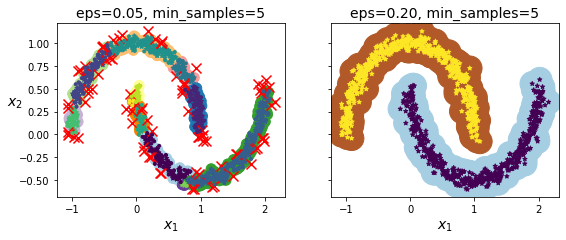

In [72]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [73]:
dbscan = dbscan2

Somewhat surprisingly, the DBSCAN class does not have a predict() method,
although it has a fit_predict() method. In other words, it cannot predict which
cluster a new instance belongs to

### KNeighborsClassifier

In [74]:
### use KNeighborsClassifier to help DBSCAN function do the prediction of a new instance

from sklearn.neighbors import KNeighborsClassifier

# 鄰近的50個為一群
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [75]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [76]:
knn.predict_proba(X_new)

array([[0.14, 0.86],
       [1.  , 0.  ],
       [0.2 , 0.8 ],
       [1.  , 0.  ]])

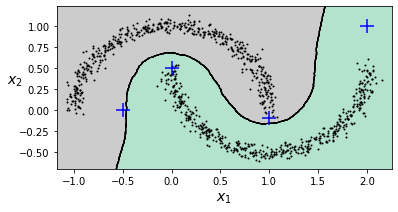

In [77]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [78]:
# 找出離 X_new 最近的〝一點〞並計算距離
# 超過 0.2 則標註 -1

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

### Gaussian Mixtures

In [79]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [80]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [81]:
gm.weights_

array([0.39068079, 0.40003627, 0.20928295])

In [82]:
gm.means_

array([[ 0.05261352,  0.07672229],
       [-1.40756974,  1.42734898],
       [ 3.40230952,  1.05802981]])

In [83]:
gm.covariances_

array([[[ 0.69028411,  0.79813703],
        [ 0.79813703,  1.21451928]],

       [[ 0.63497215,  0.72987462],
        [ 0.72987462,  1.16086144]],

       [[ 1.14337795, -0.03108819],
        [-0.03108819,  0.95393687]]])

In [84]:
# Did the algorithm actually converge?

gm.converged_

True

In [85]:
# How many iterations did it take?

gm.n_iter_

5

In [86]:
# Predict

gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [87]:
# Predict probability

gm.predict_proba(X)

array([[9.77222936e-01, 6.71504539e-07, 2.27763923e-02],
       [9.83291861e-01, 6.71705897e-04, 1.60364329e-02],
       [7.68715602e-05, 9.99921218e-01, 1.91057017e-06],
       ...,
       [4.52459265e-07, 2.07396470e-26, 9.99999548e-01],
       [5.78129102e-16, 1.39909948e-41, 1.00000000e+00],
       [2.50958417e-15, 7.58370150e-41, 1.00000000e+00]])

In [88]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.78208311, -2.7151462 ],
       [ 0.11016263, -0.8057503 ],
       [-0.94425393,  1.95061063],
       [-2.41889246, -0.02448557],
       [ 4.27194145,  1.886529  ],
       [ 1.8512737 ,  1.85110445]])

In [89]:
y_new

array([0, 0, 1, 1, 2, 2])

In [90]:
gm.score_samples(X)

array([-2.60708568, -3.57065418, -3.33138683, ..., -3.51418587,
       -4.39649753, -3.8057077 ])

In [91]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

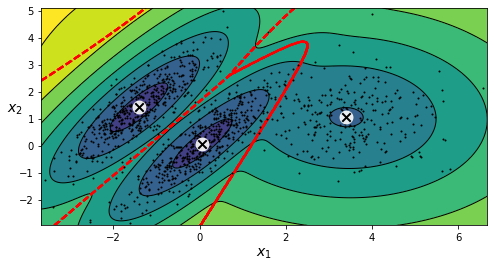

In [92]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)

plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:

* "full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* "tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* "spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).
* "diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes  
  (i.e., the covariance matrices must be diagonal).

In [93]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [94]:
def compare_gaussian_mixtures(gm1, gm2, gm3, gm4, X):
    plt.figure(figsize=(8, 8))
    
    plt.subplot(221)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(222)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)
    
    plt.subplot(223)
    plot_gaussian_mixture(gm3, X)
    plt.title('covariance_type="{}"'.format(gm3.covariance_type), fontsize=14)

    plt.subplot(224)
    plot_gaussian_mixture(gm4, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm4.covariance_type), fontsize=14)
    
    plt.tight_layout()

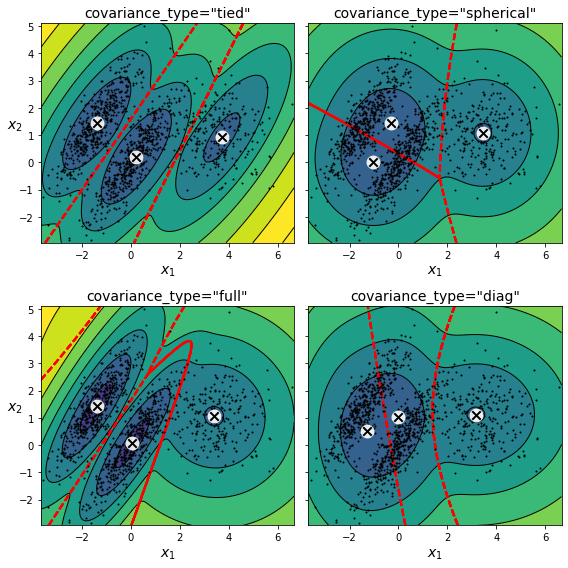

In [95]:
compare_gaussian_mixtures(gm_tied, gm_spherical, gm_full, gm_diag, X)

plt.show()

### Anomaly Detection using Gaussian Mixtures

In [96]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

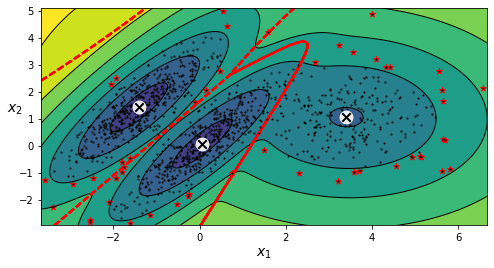

In [97]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

### Selecting the Number of Clusters

$BIC = log(m)p - 2log(\hat{L})$  
$AIC = 2p - 2log(\hat{L})$
  
$m$ is the number of instances, as always  
$p$ is the number of parameters learned by the model  
$\hat{L}$ is the maximized value of the likelihood function of the model

In [100]:
gm.bic(X), gm.aic(X)

(8189.646103381944, 8102.420823266906)

In [101]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [102]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

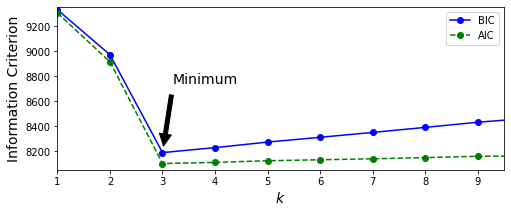

In [111]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [112]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [113]:
best_k, best_covariance_type

(3, 'full')

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, it is possible to
use instead the BayesianGaussianMixture class which is capable of giving weights
equal (or close) to zero to unnecessary clusters

In [114]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

the algorithm automatically detected that only 3 clusters are needed

### Other Anomaly Detection and Novelty Detection Algorithms

* Fast-MCD
* Isolation forest
* Local outlier factor
* One-class SVM

### Cluster the Olivetti Faces Dataset

In [117]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


In [118]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [119]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit

# split data into train and test
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [122]:
# split training data into train and valid

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [123]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [126]:
# To speed up, reduce the dimensionality by using PCA

from sklearn.decomposition import PCA

pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

59

In [127]:
# KMeans
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


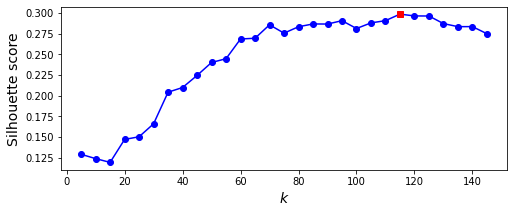

In [129]:
# Find silhouette score to define k (n_clusters)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores,"bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette score", fontsize = 14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [130]:
best_k

115

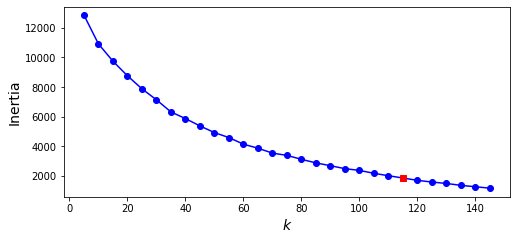

In [131]:
# inertias

inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [132]:
best_model = kmeans_per_k[best_index]

In [145]:
def plot_faces(faces, labels, n_cols=10):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Cluster 0


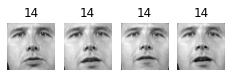

Cluster 1


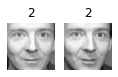

Cluster 2


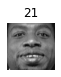

Cluster 3


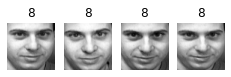

Cluster 4


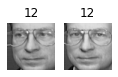

Cluster 5


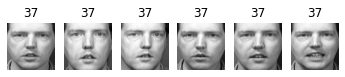

Cluster 6


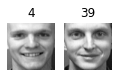

Cluster 7


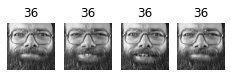

Cluster 8


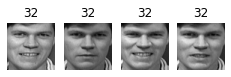

Cluster 9


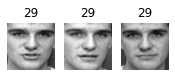

Cluster 10


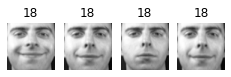

Cluster 11


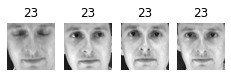

Cluster 12


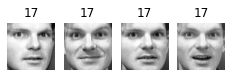

Cluster 13


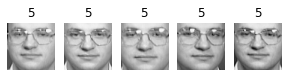

Cluster 14


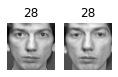

Cluster 15


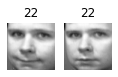

Cluster 16


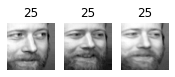

Cluster 17


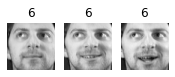

Cluster 18


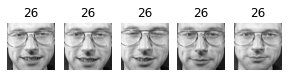

Cluster 19


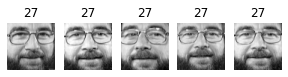

Cluster 20


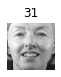

Cluster 21


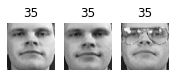

Cluster 22


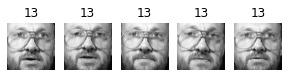

Cluster 23


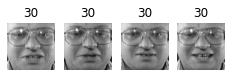

Cluster 24


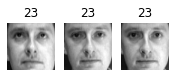

Cluster 25


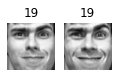

Cluster 26


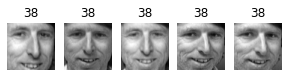

Cluster 27


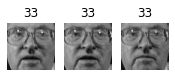

Cluster 28


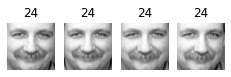

Cluster 29


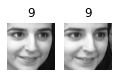

Cluster 30


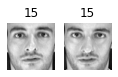

Cluster 31


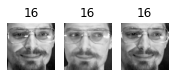

Cluster 32


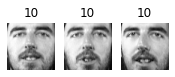

Cluster 33


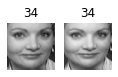

Cluster 34


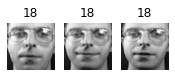

Cluster 35


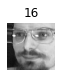

Cluster 36


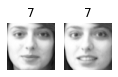

Cluster 37


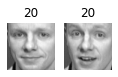

Cluster 38


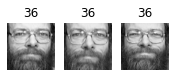

Cluster 39


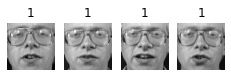

Cluster 40


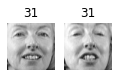

Cluster 41


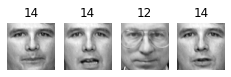

Cluster 42


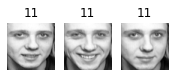

Cluster 43


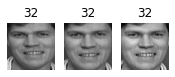

Cluster 44


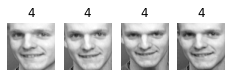

Cluster 45


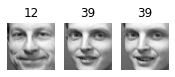

Cluster 46


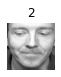

Cluster 47


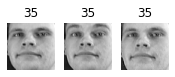

Cluster 48


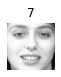

Cluster 49


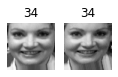

Cluster 50


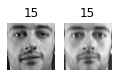

Cluster 51


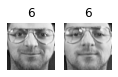

Cluster 52


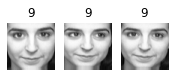

Cluster 53


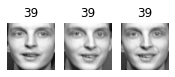

Cluster 54


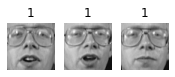

Cluster 55


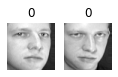

Cluster 56


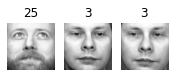

Cluster 57


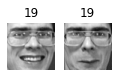

Cluster 58


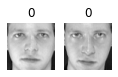

Cluster 59


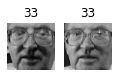

Cluster 60


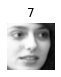

Cluster 61


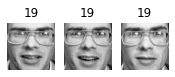

Cluster 62


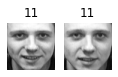

Cluster 63


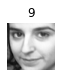

Cluster 64


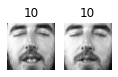

Cluster 65


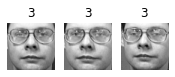

Cluster 66


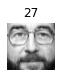

Cluster 67


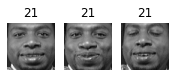

Cluster 68


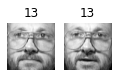

Cluster 69


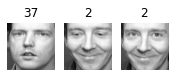

Cluster 70


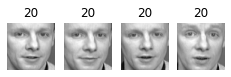

Cluster 71


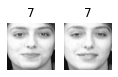

Cluster 72


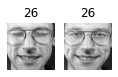

Cluster 73


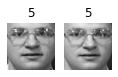

Cluster 74


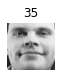

Cluster 75


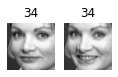

Cluster 76


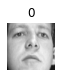

Cluster 77


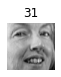

Cluster 78


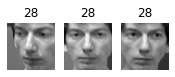

Cluster 79


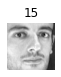

Cluster 80


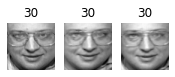

Cluster 81


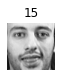

Cluster 82


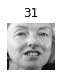

Cluster 83


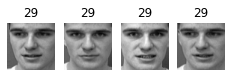

Cluster 84


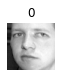

Cluster 85


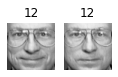

Cluster 86


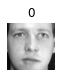

Cluster 87


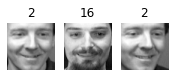

Cluster 88


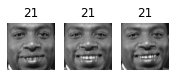

Cluster 89


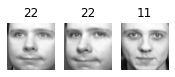

Cluster 90


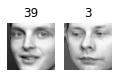

Cluster 91


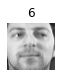

Cluster 92


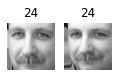

Cluster 93


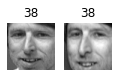

Cluster 94


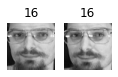

Cluster 95


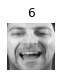

Cluster 96


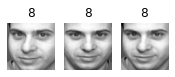

Cluster 97


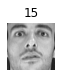

Cluster 98


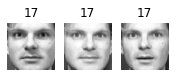

Cluster 99


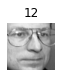

Cluster 100


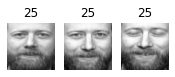

Cluster 101


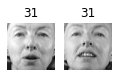

Cluster 102


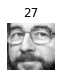

Cluster 103


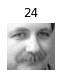

Cluster 104


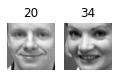

Cluster 105


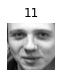

Cluster 106


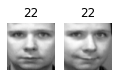

Cluster 107


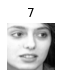

Cluster 108


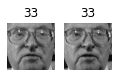

Cluster 109


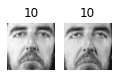

Cluster 110


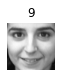

Cluster 111


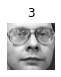

Cluster 112


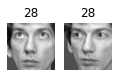

Cluster 113


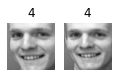

Cluster 114


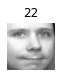

In [146]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)